In [ ]:
# MNIST
# DataLoader, Transformation
# Multilayer Neural Net, activation function
# Loss and Optimizer
# Training Loop (batch traning)
# Model evaluation
# GPU support

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data',
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                             train=False,
                                             transform=transforms.ToTensor(),
                                             download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(f"samples: {samples[1][0]}")
print(f"samples: {samples[1][0].shape}")
print(f"labels: {labels}")
print(samples.shape,labels.shape)

samples: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.000

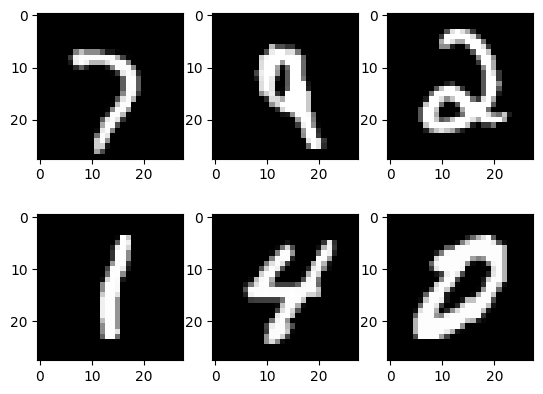

In [4]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [5]:
class NeuralNet(nn.Module):
    def __init__(self, input_size,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out



In [14]:
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

acc =  100.0 * n_correct / n_samples
print(f'accuracy = {acc}')


epoch 1 / 2, step 100/600, loss = 0.4160
epoch 1 / 2, step 200/600, loss = 0.1055
epoch 1 / 2, step 300/600, loss = 0.1580
epoch 1 / 2, step 400/600, loss = 0.1433
epoch 1 / 2, step 500/600, loss = 0.1448
epoch 1 / 2, step 600/600, loss = 0.0667
epoch 2 / 2, step 100/600, loss = 0.0822
epoch 2 / 2, step 200/600, loss = 0.1256
epoch 2 / 2, step 300/600, loss = 0.1864
epoch 2 / 2, step 400/600, loss = 0.1153
epoch 2 / 2, step 500/600, loss = 0.0829
epoch 2 / 2, step 600/600, loss = 0.0747
accuracy = 0.93


![alt text](./images/image-34.png)
![alt text](./images/image-35.png)
![alt text](./images/image-36.png)